# Librerías

In [34]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Funciones

# Datos resultados

In [35]:
df = pd.read_csv("./portfolios_metrics.csv")
df

,Portfolio,Mu,Sigma,Sharpe,Treynor,Sortino,Omega,Mu_anual,Sigma_anual,Beta,VaR,CVaR,MaxDrawdown,Profit_%,YearMonth,Year,Asset_Class,Method
0,Sharpe,3.425,5.905,0.580,0.026,0.840,4.022,41.104,20.457,1.319,0.062,0.089,8.922,47.062,2019-12,2019,Tecnologia,Sharpe
1,Sharpe,3.377,6.975,0.484,0.045,1.510,3.081,40.524,24.163,0.757,0.065,0.074,9.785,45.246,2020-12,2020,Tecnologia,Sharpe
2,Sharpe,3.357,6.993,0.480,0.066,1.136,4.129,40.288,24.224,0.506,0.049,0.074,7.434,45.006,2021-12,2021,Tecnologia,Sharpe
3,Sharpe,-2.889,9.987,-0.289,-0.020,-0.554,0.513,-34.674,34.595,1.476,0.156,0.163,36.476,-33.589,2022-12,2022,Tecnologia,Sharpe
4,Sharpe,2.583,8.254,0.313,0.022,0.508,2.189,30.992,28.592,1.154,0.105,0.120,14.112,30.942,2023-12,2023,Tecnologia,Sharpe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Risk_Parity,-0.152,6.126,-0.025,-0.002,-0.027,0.935,-1.819,21.220,0.765,0.098,0.149,19.658,-3.919,2020-12,2020,Alternativos,Risk_Parity
320,Risk_Parity,2.718,3.555,0.765,0.028,1.609,6.281,32.617,12.314,0.973,0.028,0.038,3.817,37.051,2021-12,2021,Alternativos,Risk_Parity
321,Risk_Parity,-0.521,7.518,-0.069,-0.006,-0.109,0.837,-6.253,26.043,0.923,0.116,0.139,16.715,-9.014,2022-12,2022,Alternativos,Risk_Parity
322,Risk_Parity,0.784,4.179,0.188,0.009,0.470,1.558,9.414,14.478,0.833,0.053,0.057,8.257,8.787,2023-12,2023,Alternativos,Risk_Parity


# Resultados de métodos de optimización

In [36]:
metricas = ["Sharpe","Treynor","Sortino","Beta", "VaR", "CVaR","MaxDrawdown","Profit_%"]

resultados_por_metodo = df.groupby("Method")[metricas].mean().reset_index()

resultados_por_metodo.round(3)

,Method,Sharpe,Treynor,Sortino,Beta,VaR,CVaR,MaxDrawdown,Profit_%
0,PMVg,0.239,0.017,1.332,0.998,0.084,0.105,14.892,29.898
1,Risk_Parity,0.275,0.039,0.904,0.995,0.075,0.094,13.653,36.564
2,Sharpe,0.277,0.034,1.058,0.883,0.087,0.109,15.286,28.880
3,Sortino,0.277,0.034,1.059,0.883,0.087,0.109,15.286,28.870
4,Treynor,0.274,0.040,0.918,0.999,0.085,0.107,14.928,30.094
5,VaR_CVaR,0.219,0.007,0.762,0.903,0.088,0.107,15.976,24.642


In [37]:
#plt.style.use('seaborn-v0_8-whitegrid')
#for var in metricas:
#    plt.figure(figsize=(8, 5))
#    sns.boxplot(data=df, x="Method", y=var, palette="Set2", showmeans=True,
#                meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})
#    plt.title(f'Boxplot de {var} por Método', fontsize=14)
#    plt.xlabel('Método', fontsize=12)
#    plt.ylabel(var, fontsize=12)
#    plt.xticks(rotation=30)
#    plt.tight_layout()
#    #plt.savefig(f'./boxplot_{var}.png', dpi=1000)
#    #plt.show()

In [38]:

#sns.set_style("whitegrid")
#sns.set_context("talk")
#
#palette = sns.color_palette("Set2")
#
#for var in metricas:
#    plt.figure(figsize=(12, 6))
#    
#    # Barplot con media explícita
#    ax = sns.barplot(
#        data=df, x="Method", y=var,
#        palette=palette, ci=None, estimator='mean'
#    )
#    
#    # Títulos y etiquetas
#    ax.set_title(f"Promedio de {var} por Método", fontsize=16, weight='bold', pad=20)
#    ax.set_xlabel("Método", fontsize=13)
#    ax.set_ylabel(var, fontsize=13)
#    ax.tick_params(axis='x', rotation=30)
#    
#    # Añadir valores sobre las barras
#    for p in ax.patches:
#        value = p.get_height()
#        ax.annotate(
#            f'{value:.2f}',
#            (p.get_x() + p.get_width() / 2., value),
#            ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 3),
#            textcoords='offset points'
#        )
#    
#    # Eliminar bordes superiores y derechos para estética
#    sns.despine()
#    plt.tight_layout()
#
#    # Guardar la figura
#    #plt.savefig(f'./barplot_{var}.png', dpi=1000)
#    plt.show()

# Resultados por clase de activos

In [39]:
resultados_por_clase_de_activos = df.groupby("Asset_Class")[metricas].mean().reset_index()
resultados_por_clase_de_activos.round(3)

,Asset_Class,Sharpe,Treynor,Sortino,Beta,VaR,CVaR,MaxDrawdown,Profit_%
0,Alternativos,0.240,0.005,0.569,0.579,0.066,0.079,10.411,9.453
1,Bonos,0.255,0.003,2.654,0.130,0.012,0.014,2.793,1.314
2,Consumo,0.368,0.025,1.573,0.716,0.049,0.058,7.774,19.878
3,Criptomonedas,0.291,0.020,1.316,2.357,0.201,0.257,38.321,152.077
4,Energia,0.105,0.136,0.219,0.808,0.112,0.145,20.552,9.047
5,Financieros,0.275,0.015,0.696,1.067,0.094,0.120,15.922,15.603
6,Industriales,0.212,0.016,0.453,1.169,0.090,0.108,16.738,17.455
7,Salud,0.236,0.012,0.572,0.566,0.058,0.071,9.109,15.461
8,Tecnologia,0.354,0.024,1.046,1.146,0.082,0.103,14.529,28.132


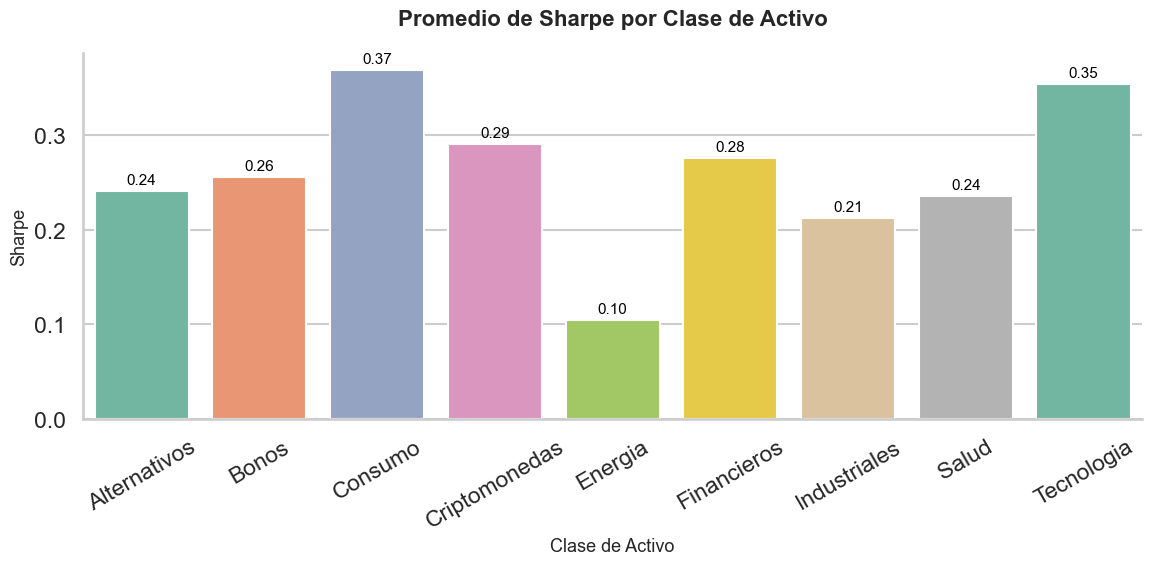

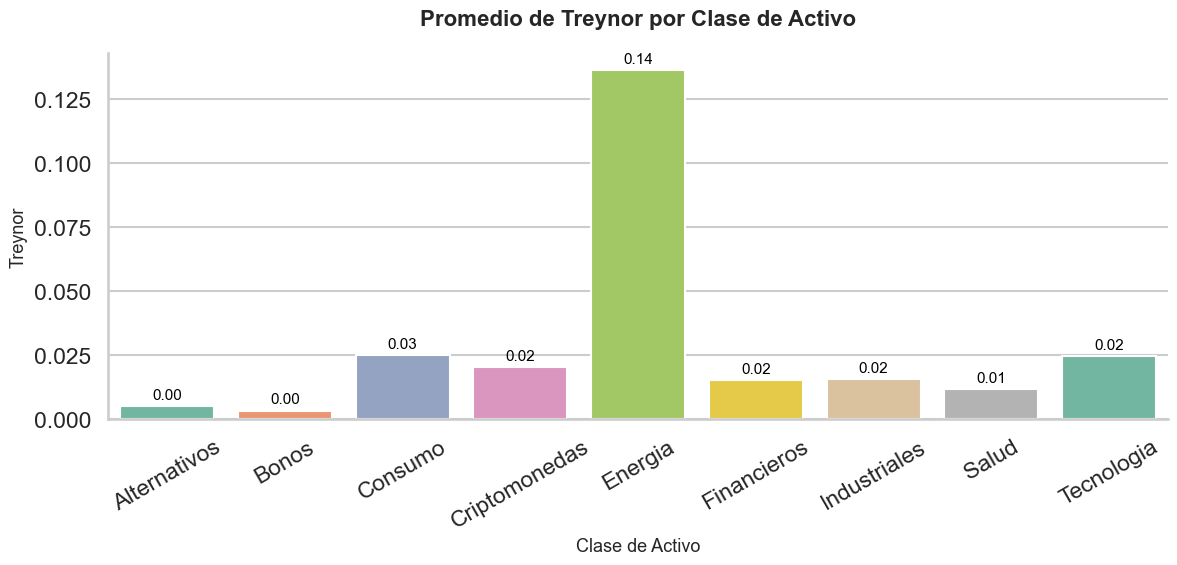

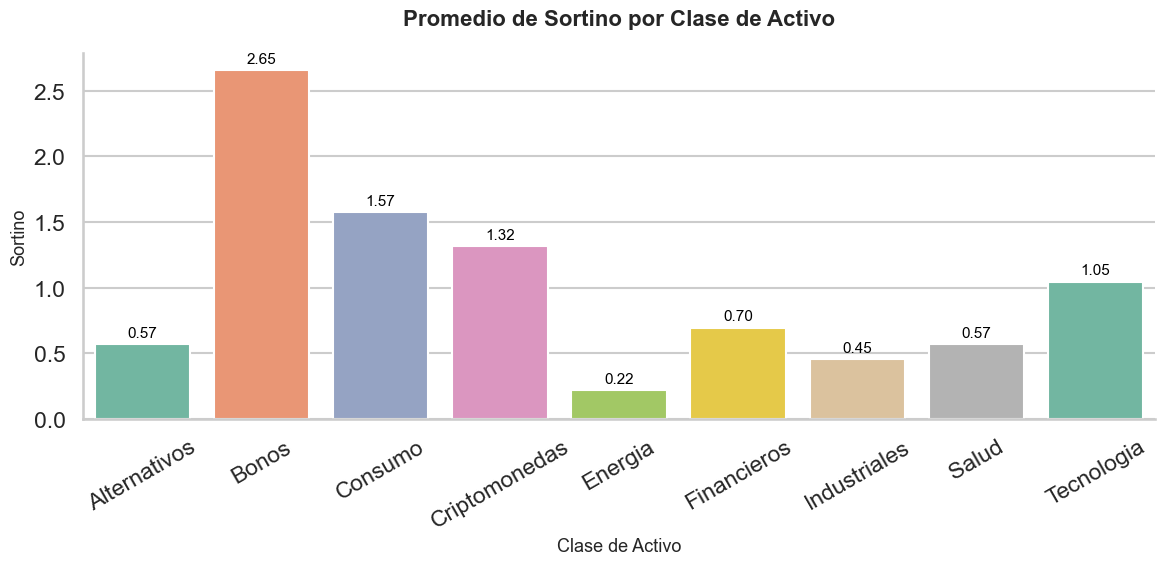

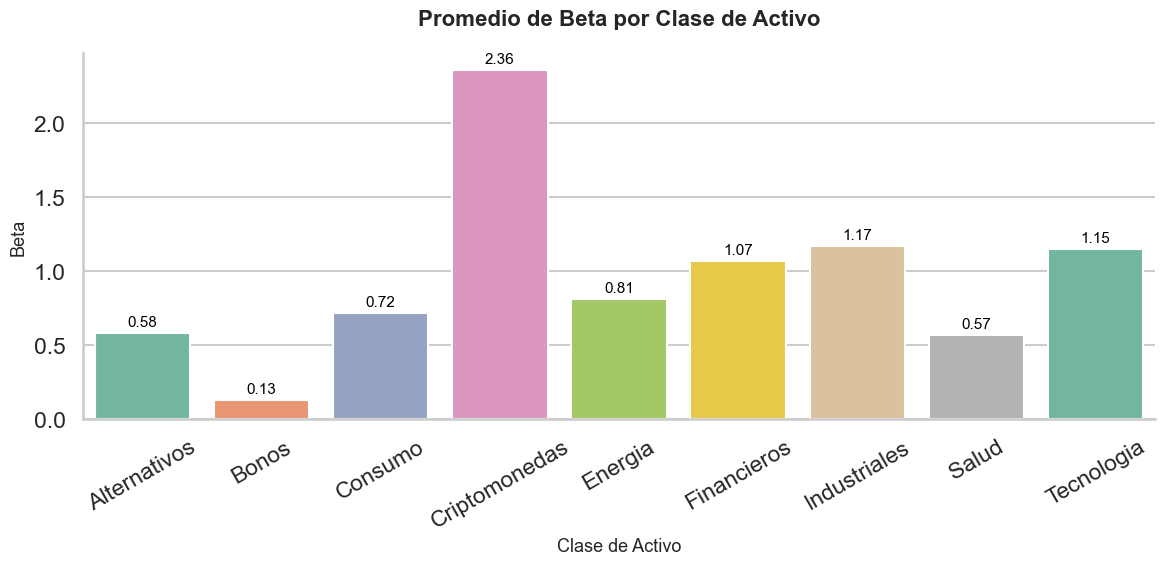

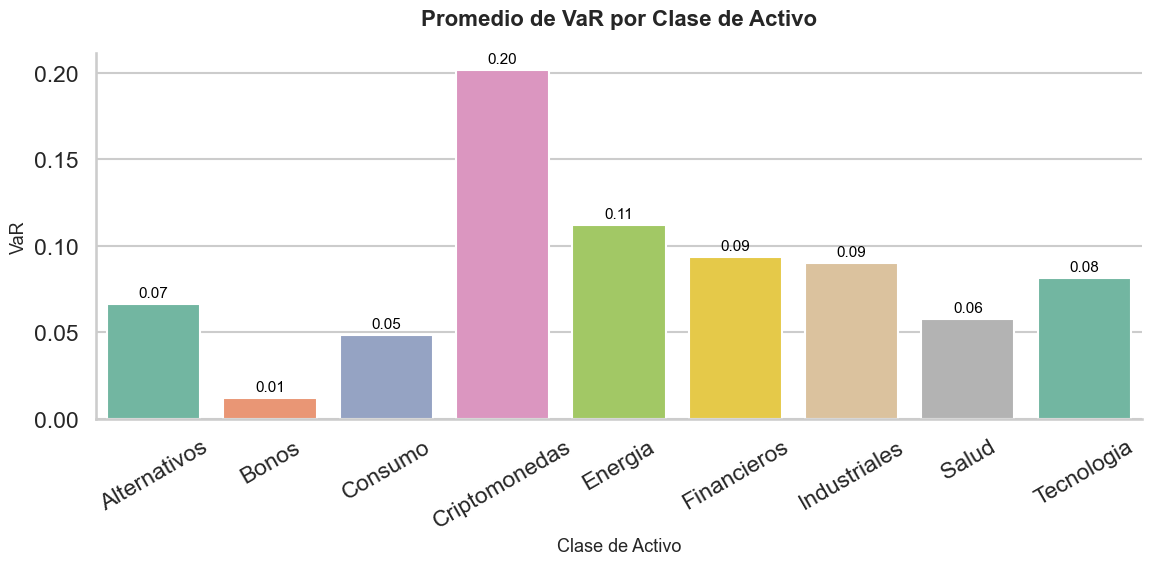

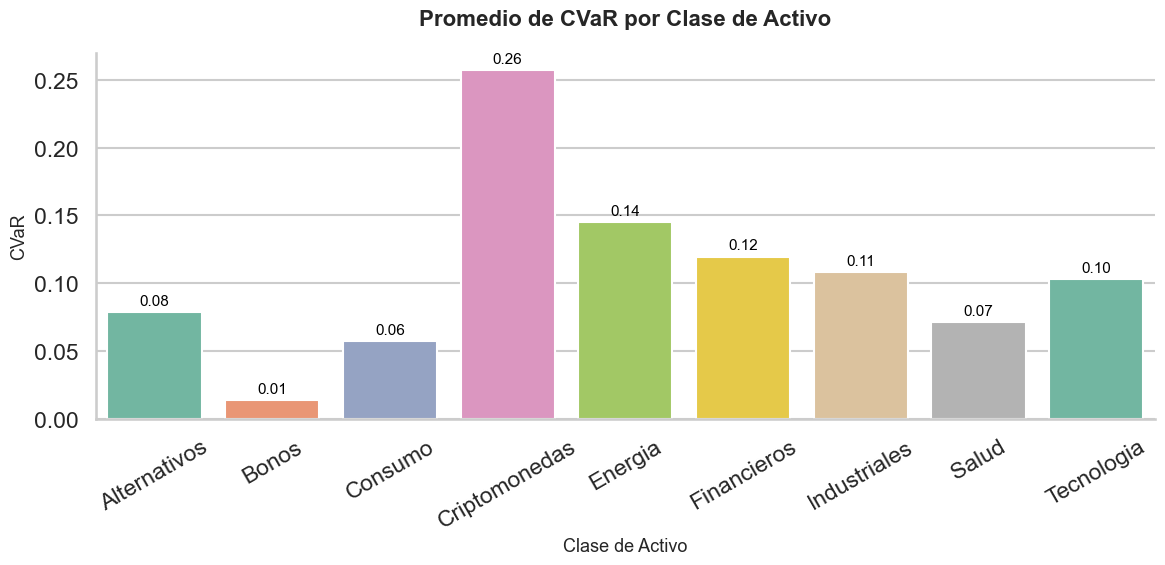

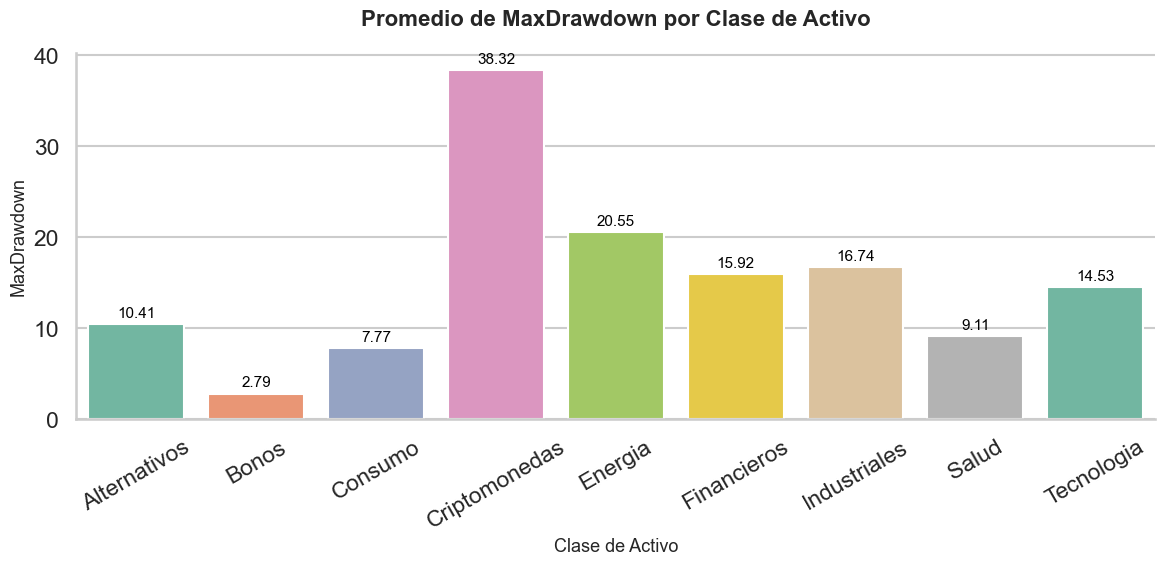

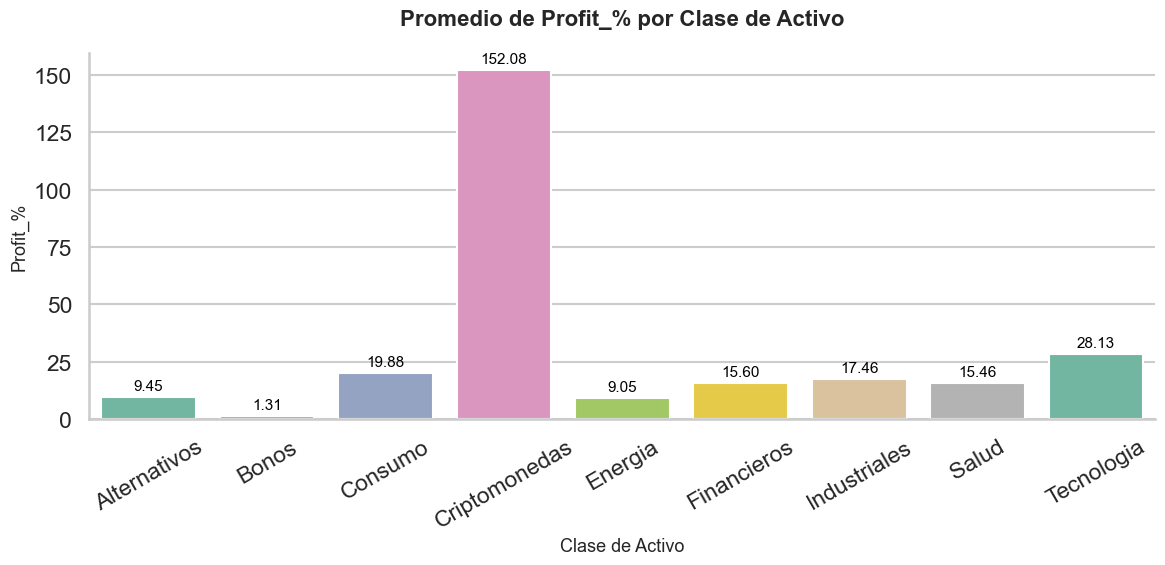

In [40]:
asset_classes = resultados_por_clase_de_activos["Asset_Class"].tolist()
# Estilo y contexto más profesional
sns.set_style("whitegrid")
sns.set_context("talk")

# Paleta de colores personalizada (puedes cambiarla)
palette = sns.color_palette("Set2")

for var in metricas:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=resultados_por_clase_de_activos,
        x="Asset_Class",
        y=var,
        palette=palette
    )
    ax.set_title(f"Promedio de {var} por Clase de Activo", fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Clase de Activo", fontsize=13)
    ax.set_ylabel(var, fontsize=13)
    ax.tick_params(axis='x', rotation=30)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(
            f'{value:.2f}',
            (p.get_x() + p.get_width() / 2., value),
            ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 3),
            textcoords='offset points'
        )
    sns.despine()
    plt.tight_layout()
    #plt.savefig(f'./barplot_{var}_por_clase_activo.png', dpi=1000)
    plt.show()

# Resultados por perfil de riesgo

In [41]:
resultados_por_clase_de_activos

,Asset_Class,Sharpe,Treynor,Sortino,Beta,VaR,CVaR,MaxDrawdown,Profit_%
0,Alternativos,0.240417,0.004861,0.568611,0.578750,0.066194,0.078722,10.411250,9.452528
1,Bonos,0.255257,0.003257,2.654371,0.129886,0.012057,0.013629,2.793429,1.313806
2,Consumo,0.368083,0.025083,1.573194,0.715556,0.048528,0.057556,7.774306,19.878444
3,Criptomonedas,0.290559,0.020324,1.315912,2.356735,0.201353,0.256853,38.321353,152.076750
4,Energia,0.104800,0.136171,0.218971,0.807857,0.111771,0.144743,20.552200,9.046833
5,Financieros,0.275278,0.015111,0.695833,1.067278,0.093667,0.119583,15.922306,15.603333
6,Industriales,0.211667,0.015722,0.453278,1.168778,0.090194,0.108028,16.737889,17.455472
7,Salud,0.235528,0.011556,0.572194,0.565972,0.057667,0.071056,9.109139,15.461250
8,Tecnologia,0.353583,0.024389,1.045667,1.146361,0.081583,0.103056,14.529000,28.131917


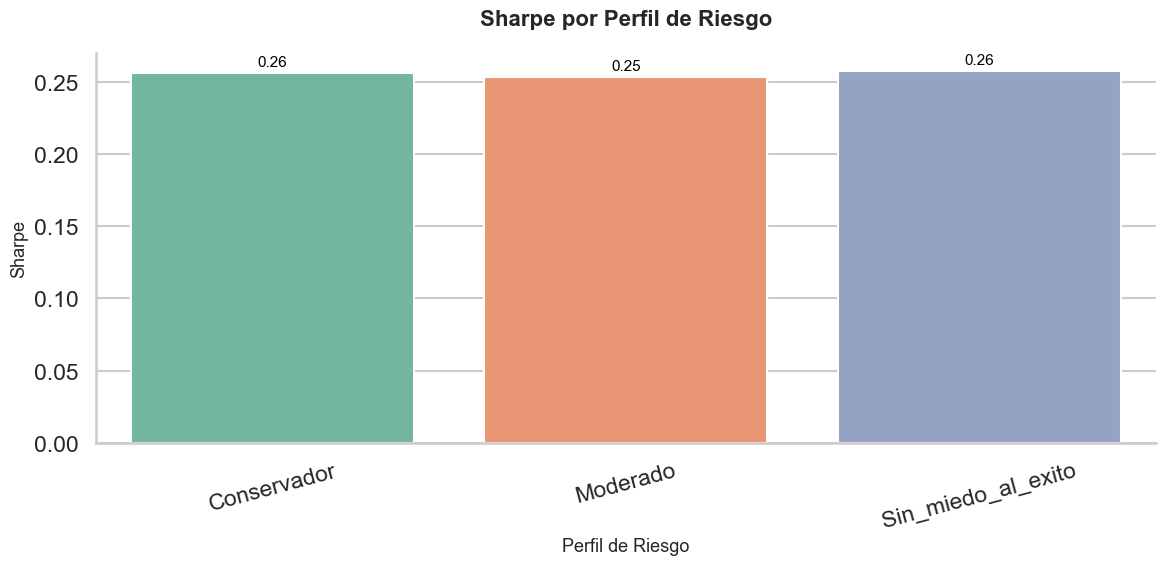

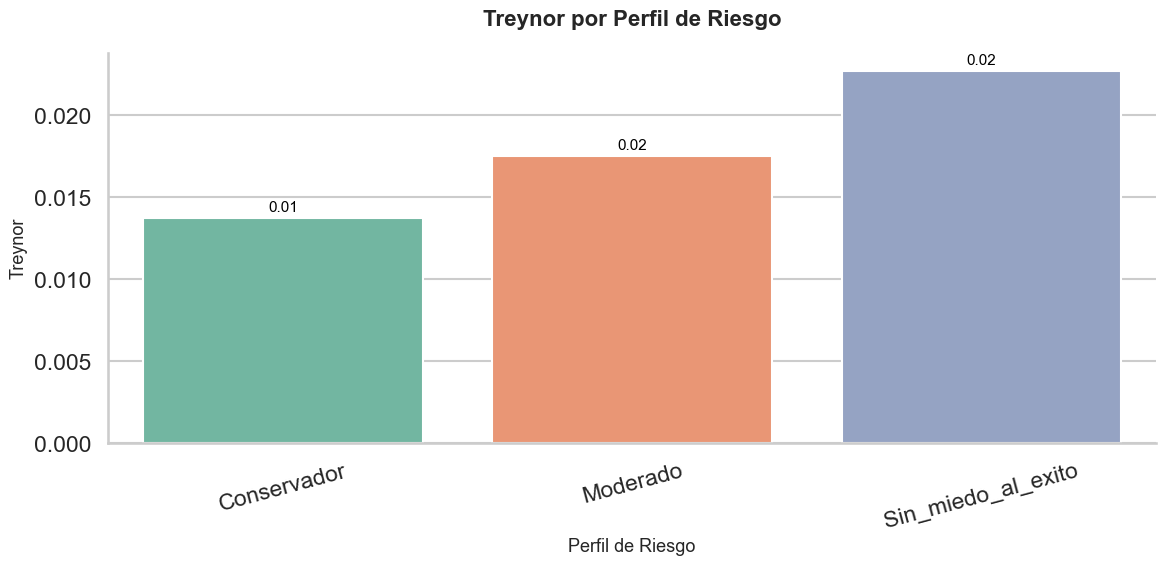

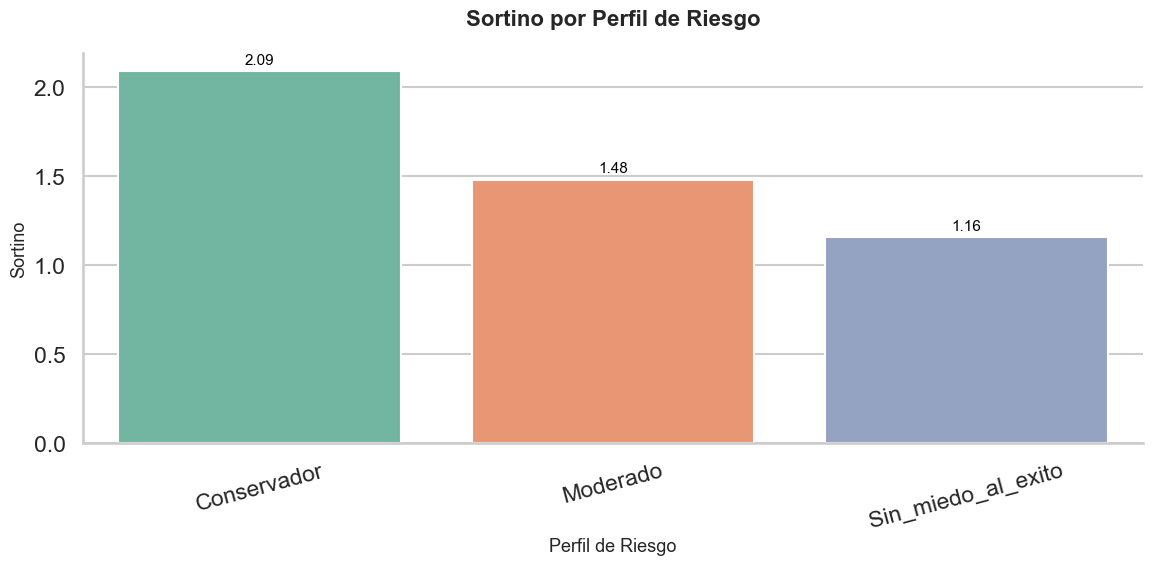

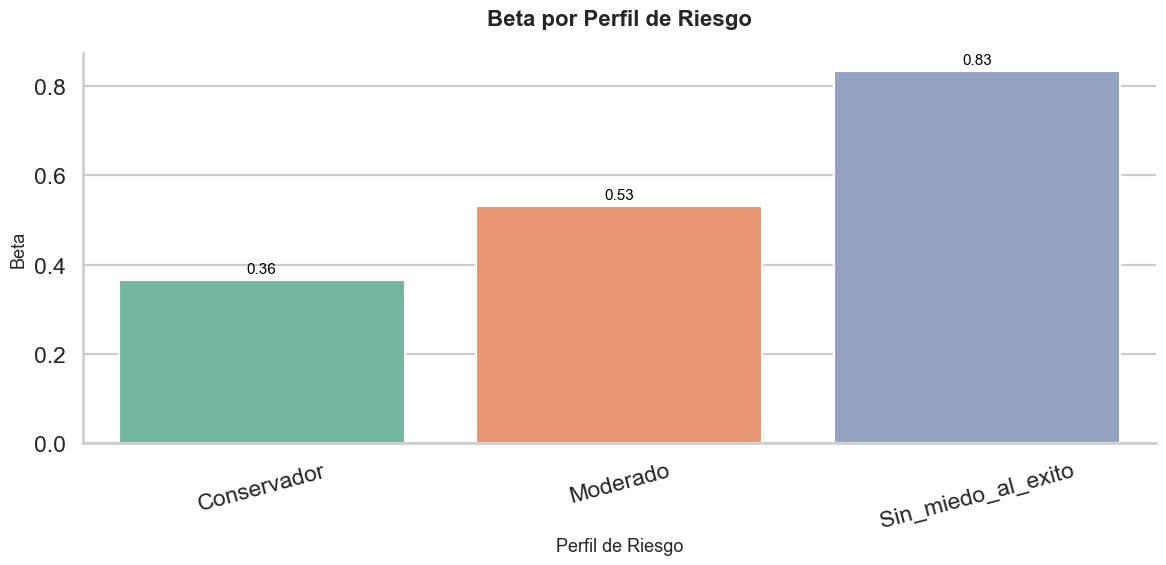

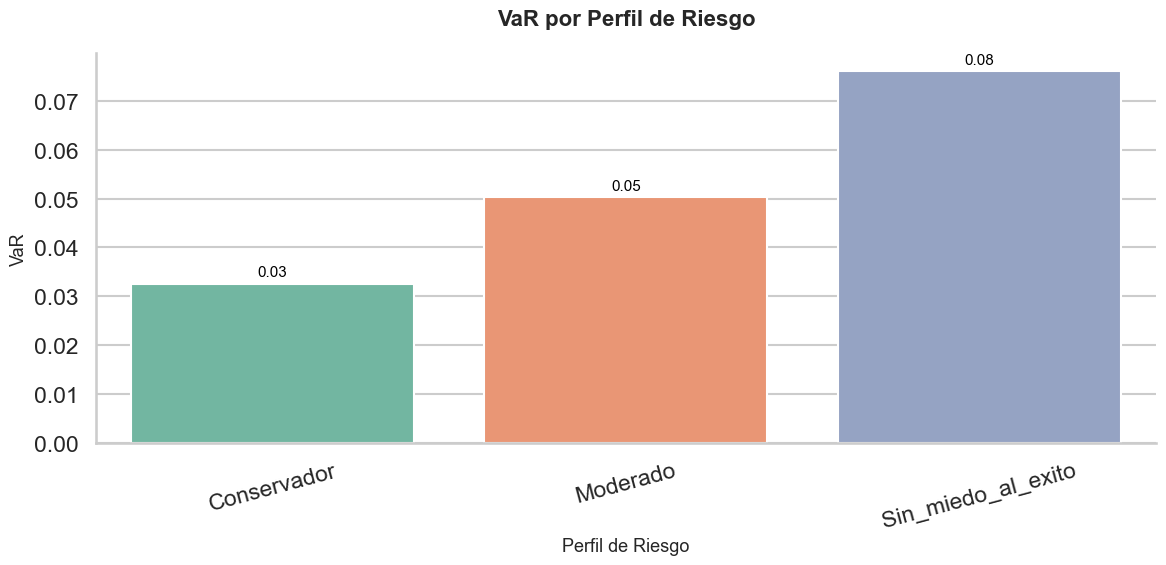

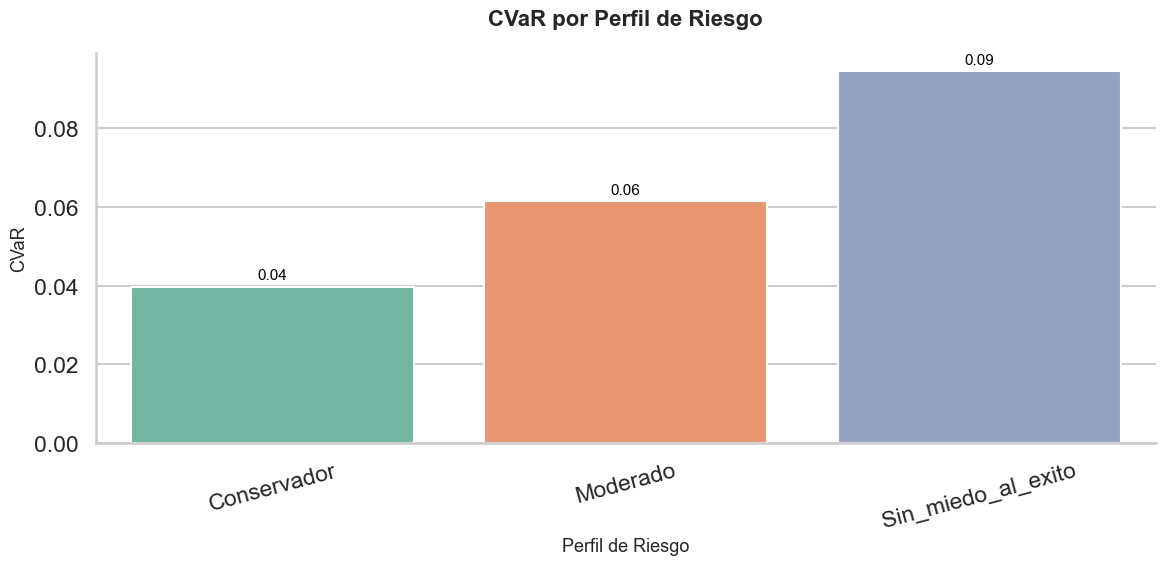

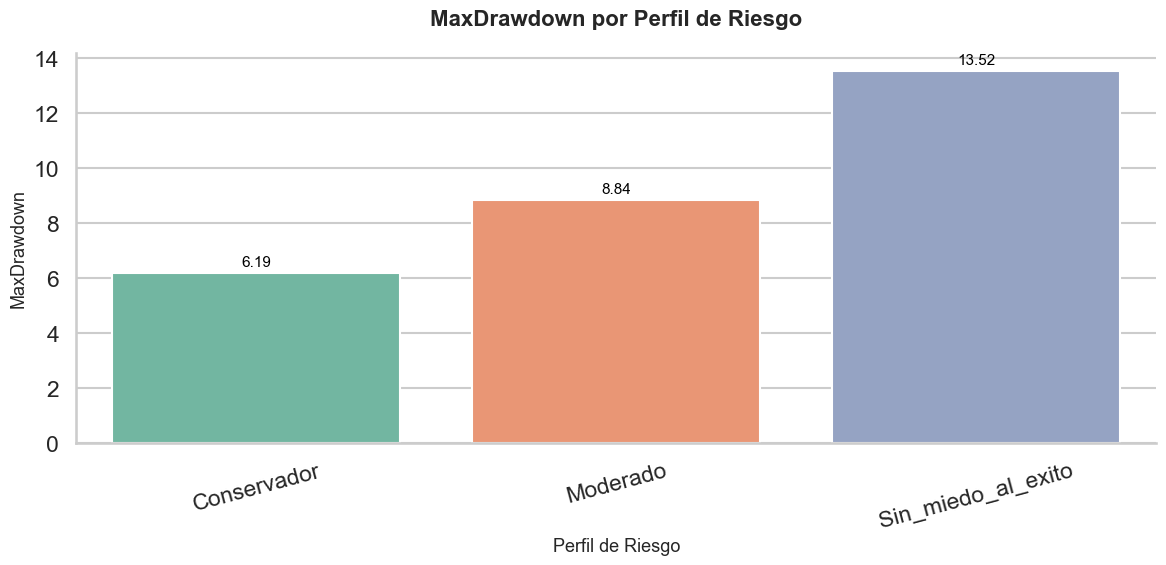

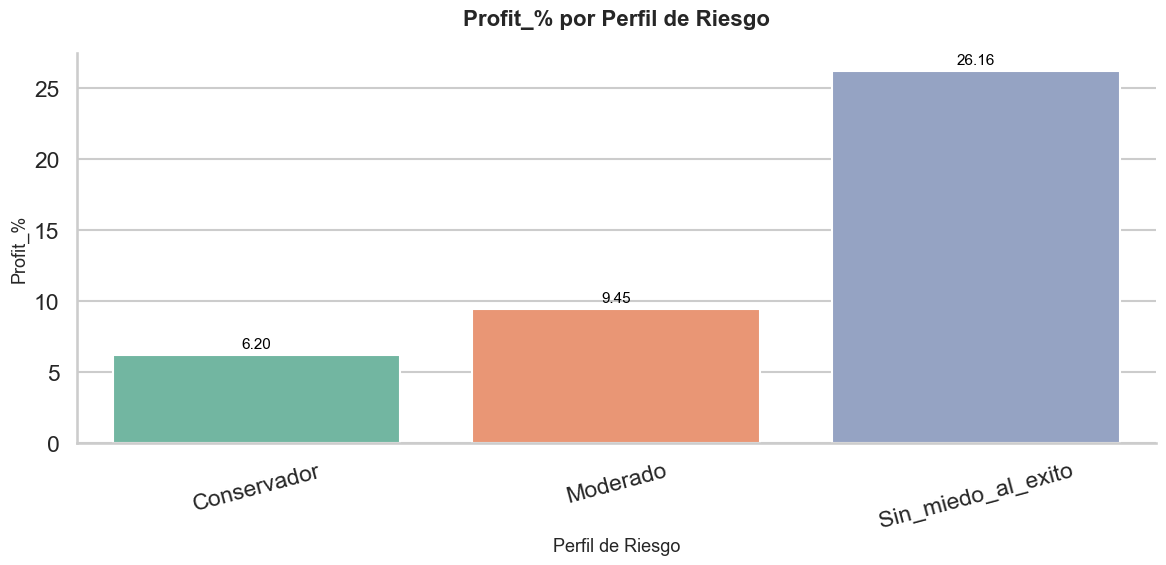

In [42]:
resultados_por_clase_de_activos["Conservador"] = [0, 70, 5, 0, 5, 5, 5, 5, 5]
resultados_por_clase_de_activos["Moderado"] = [20, 40, 6.66, 0, 6.66, 6.66, 6.66, 6.66, 6.66]
resultados_por_clase_de_activos["Sin_miedo_al_exito"] = [20, 20, 8.33, 10, 8.33, 8.33, 8.33, 8.33, 8.33]

# --- Preparación de datos ---
metricas = ["Sharpe","Treynor","Sortino","Beta", "VaR", "CVaR","MaxDrawdown","Profit_%"]

# Aquí guardaremos todos los resultados
resultados_lista = []

for metric in metricas:
    resultados_perfiles = resultados_por_clase_de_activos[[metric]].copy()
    resultados_perfiles["Conservador"] = resultados_perfiles[metric] * resultados_por_clase_de_activos["Conservador"] / 100
    resultados_perfiles["Moderado"] = resultados_perfiles[metric] * resultados_por_clase_de_activos["Moderado"] / 100
    resultados_perfiles["Sin_miedo_al_exito"] = resultados_perfiles[metric] * resultados_por_clase_de_activos["Sin_miedo_al_exito"] / 100
    resultados_perfiles = resultados_perfiles.drop(columns=[metric])
    resultados_sum = resultados_perfiles.sum()

    # Guardar resultados en formato largo
    for perfil, valor in resultados_sum.items():
        resultados_lista.append({"Métrica": metric, "Perfil": perfil, "Valor": valor})

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados_lista)

# --- Gráficos ---
sns.set_style("whitegrid")
sns.set_context("talk")
palette = sns.color_palette("Set2")

for metric in metricas:
    plt.figure(figsize=(12, 6))
    data_metric = df_resultados[df_resultados["Métrica"] == metric]
    ax = sns.barplot(
        data=data_metric,
        x="Perfil",
        y="Valor",
        palette=palette
    )
    ax.set_title(f"{metric} por Perfil de Riesgo", fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Perfil de Riesgo", fontsize=13)
    ax.set_ylabel(metric, fontsize=13)
    ax.tick_params(axis='x', rotation=15)

    # Añadir valores sobre las barras
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(
            f'{value:.2f}',
            (p.get_x() + p.get_width() / 2., value),
            ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 3),
            textcoords='offset points'
        )

    sns.despine()
    plt.tight_layout()
    plt.savefig(f'./barplots_perfil/barplot_{metric}_por_perfil_riesgo.png', dpi=1200)
    plt.show()